## Stores Sales Prediction

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [57]:
train=pd.read_csv('BigMartTrain.csv')

1. Feature Engineering

## 1. Exploratory DataAnalysis


In [58]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
train.shape

(8523, 12)

In [60]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
#checking for missing data
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [63]:
numeric_col = train.dtypes[(train.dtypes == 'int64') | (train.dtypes == 'float64')]
numeric_col

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

## 2. Handling missing data

In [64]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\Kamalaksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


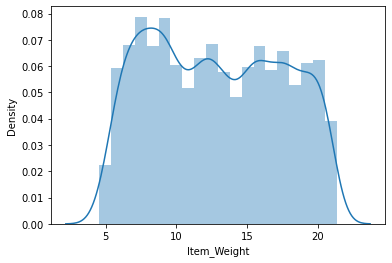

In [65]:
#for mean imputation checking wheather Item_Weight feature is normaly distrubuted or not
sns.distplot(train['Item_Weight'])
plt.show()

In [66]:
#Median Imputaion for Item_Weight feature
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [67]:
#Random sample Imputation for Outlet_size feature
train['Random_Outlet_Size'] = train['Outlet_Size']
random_sample = train['Outlet_Size'].dropna().sample(train['Outlet_Size'].isnull().sum(),random_state=0)
random_sample.index =  train[train['Random_Outlet_Size'].isnull()].index
train.loc[train['Outlet_Size'].isnull(),'Random_Outlet_Size'] = random_sample


In [72]:
train.drop('Outlet_Size',axis=1,inplace=True)

In [82]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Random_Outlet_Size
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,0,1,3735.1380,1
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,2,2,443.4228,1


In [15]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Random_Outlet_Size           0
dtype: int64

Checking for correlation

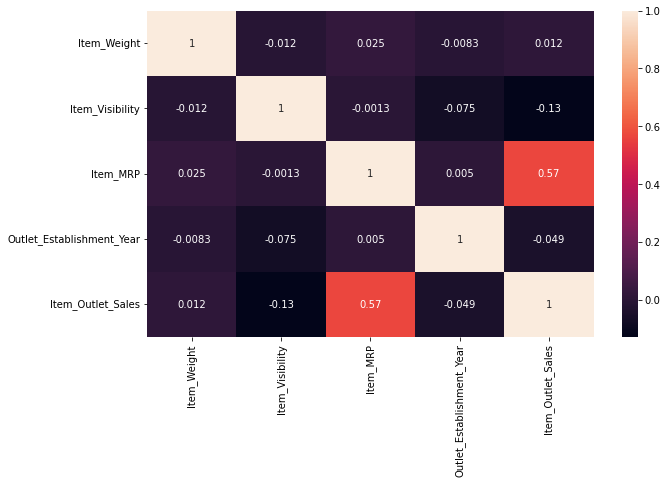

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)
plt.show()

## 3. **Handling categorical data**

In [17]:
from sklearn.preprocessing import LabelEncoder
lebel_encoder =  LabelEncoder()

In [18]:
train.select_dtypes(object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Random_Outlet_Size
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1,Medium
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2,Medium
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1,Medium
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,Small
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1,High
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1,High
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1,Small
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,Small
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2,Medium


In [19]:
#Handling Item_fate_content feature
#train['Item_Fat_Content'].unique()

In [20]:
#replacing ('low fat',LF) variables to 'Low Fat' and 'reg' to 'Regular' beacause they are same 
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace=True)

In [21]:
#Now performing Ordinal Encoding on 'Item_Fat_Content' feature
#train['Item_Fat_Content'].replace({'Regular':1,'Low Fat':2},inplace=True)


In [22]:
#Performing Ordinal Encoding on Outlet_Location_Type	
#train['Outlet_Location_Type'].unique()

In [23]:
#train['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace=True)


In [24]:
#performin ordinal encoding on Outlet_Type and Random_Outlet_Size
#train['Outlet_Type'].unique()
#train['Random_Outlet_Size'].unique()

In [25]:
#train['Outlet_Type'].replace({'Supermarket Type1':3,'Supermarket Type2':2,'Supermarket Type3':1,'Grocery Store':0},inplace=True)
#train['Random_Outlet_Size'].replace({'High':3,'Medium':2,'Small':1},inplace=True)


In [26]:
#Performing encoding on Item_Type

In [27]:
# #Performing one-hot Encoding on Item_Type
# New_Item_Type = pd.get_dummies(train['Item_Type'],drop_first=True)
# train = pd.concat([train,New_Item_Type],axis=1)
# train.drop('Item_Type',axis=1,inplace=True)
# #Performing label encoding to get better accuracy


In [76]:
#Performing label encodinf on categorical data

train['Item_Type'] = lebel_encoder.fit_transform(train['Item_Type'])
train['Outlet_Type'] = lebel_encoder.fit_transform(train['Outlet_Type'])
train['Random_Outlet_Size'] = lebel_encoder.fit_transform(train['Random_Outlet_Size'])
train['Outlet_Location_Type'] = lebel_encoder.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = lebel_encoder.fit_transform(train['Item_Fat_Content'])

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Random_Outlet_Size
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,0,1,3735.1380,1
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,2,2,443.4228,1
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,0,1,2097.2700,1
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,2,0,732.3800,2
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,2,1,994.7052,0


In [80]:
train['Outlet_Location_Type'].head(5)

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int32

In [30]:
#performing one hot encoding
#df = train[['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Random_Outlet_Size']]
#df1 = pd.get_dummies(train['Item_Fat_Content'],prefix="Item_Fat",drop_first=True)
#df2= pd.get_dummies(train['Outlet_Location_Type'],prefix="Outlet_location",drop_first=True)
#df3 = pd.get_dummies(train['Outlet_Type'],prefix="Outlet_Type",drop_first=True)
#df4 = pd.get_dummies(train['Random_Outlet_Size'],prefix="Random_Outlet_Size",drop_first=True)
#train = pd.concat([df1,df2,df3,df4,train],axis=1)
#train.head()

Checking for Outliers

In [31]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Random_Outlet_Size'],
      dtype='object')

C:\Users\Kamalaksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

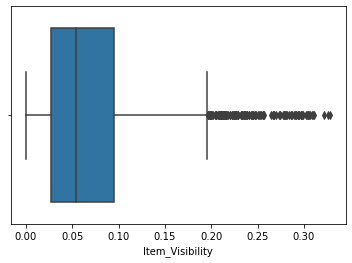

In [32]:
sns.boxplot(train['Item_Visibility'])

In [33]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 =  train['Item_Visibility'].quantile(0.75)
IQR =  Q3-Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

train = train[(train['Item_Visibility']>lower_range) & (train['Item_Visibility']<upper_range)]



C:\Users\Kamalaksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

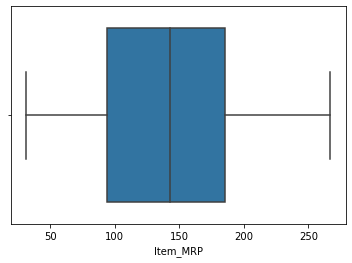

In [34]:
sns.boxplot(train['Item_MRP'])

In [35]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Random_Outlet_Size
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,0,1,3735.1380,1
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,2,2,443.4228,1
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,0,1,2097.2700,1
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,0,732.3800,2


## 2.Feature Selection

In [36]:
#we will remove Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year because these features are not needed to predict the sales
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [37]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Random_Outlet_Size
0,9.30,0,0.016047,4,249.8092,0,1,3735.1380,1
1,5.92,1,0.019278,14,48.2692,2,2,443.4228,1
2,17.50,0,0.016760,10,141.6180,0,1,2097.2700,1
3,19.20,1,0.000000,6,182.0950,2,0,732.3800,2
4,8.93,0,0.000000,9,53.8614,2,1,994.7052,0


Splitting the train data

In [38]:
x = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 0)

Preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [51]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Random_Outlet_Size
0,9.30,0,0.016047,4,249.8092,0,1,1
1,5.92,1,0.019278,14,48.2692,2,2,1
2,17.50,0,0.016760,10,141.6180,0,1,1
3,19.20,1,0.000000,6,182.0950,2,0,2
4,8.93,0,0.000000,9,53.8614,2,1,0


## 3. Model Creation

Ensemble Technique

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
rypred = model.predict(xtest)
r2_score(ytest,rypred)

0.5472981089848812

In [42]:
#Hyperparamter tunning on randomforest
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_grid ={
         'n_estimators':[i for i in range(200,2001,200)],
         'max_depth':[int(i) for i in np.linspace(10,1000,10)],
         'min_samples_split' : [2, 5, 10,14],
         'min_samples_leaf' : [1, 2, 4,6,8],
         'max_features' : ['auto', 'sqrt','log2']
}
best_r_model = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid,cv = 3)
print(best_r_model.estimator)
best_r_model.fit(xtrain,ytrain)
random_ypred = best_r_model.predict(xtest)
r2_score(ytest,random_ypred)

RandomForestRegressor()


0.5968523064306069

In [44]:
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score

In [45]:
# xgbmodel = XGBRegressor()

# xgbmodel.fit(xtrain,ytrain)
# xg_pred = xgbmodel.predict(xtest)
# r2_score(ytest,xg_pred)

In [46]:
#Hyperparameter tunning on XgBootRegressor
# xgbmodel = XGBRegressor()
# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }
# hxgbmodel = RandomizedSearchCV(xgbmodel,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
# hxgbmodel.fit(xtrain,ytrain)

In [47]:
#hxgbmodel.best_estimator_

In [48]:
#hxgbmodel.best_score_

In [49]:
# hypred = hxgbmodel.predict(xtest)
# r2_score(ytest,hypred)

In [50]:
file = open("random_model.pkl","wb")
pickle.dump(best_r_model,file)

In [85]:
file = open("random_model.pkl","rb")
rmodel = pickle.load(file)
X= np.array([[9.30,0,0.016047,4,249.8092,0,1,1]])
prediction = rmodel.predict(X)
print(prediction)

[3716.33650227]


In [87]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(best_r_model, filename)

['finalized_model.sav']